<a href="https://colab.research.google.com/github/xxMateusz/12212121/blob/main/Titanic_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df = pd.concat([train,test],axis=0,ignore_index=True)

In [ ]:
df.shape

(1309, 12)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Cabin,1014
Survived,418
Age,263
Embarked,2
Fare,1
Name,0
PassengerId,0
Pclass,0
Parch,0
SibSp,0


In [ ]:
df.drop

<bound method DataFrame.drop of       PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male   NaN      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male   NaN      0   
1308                           Peter, Master. Michael J    male   NaN      1   

      Parch              Ticket      Fare Cabin Embarked  
0         0           A/5 21171    7.2500   NaN        S  
1         0            PC 17599   71.2833   C85        C  
2         0    STON/O2. 3101282    7.9250   NaN        S  
3         0              113803   53.1000  C123        S  
4         0              373450    8.0500   NaN        S  
...     ...                 ...       ...   ...      ...  
1304      0           A.5. 3236    8.0500   NaN        S  
1305      0            PC 17758  108.9000  C105        C  
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
1307      0              359309    8.0500   NaN        S  
1308      1                2668   22.3583   NaN        C  

[1309 rows x 12 columns]>

In [ ]:
df['CabinDeck']=df['Cabin'].str[0]

In [ ]:
df['CabinDeck']=df['CabinDeck'].fillna('U')

In [ ]:
df['CabinDeck']

,CabinDeck
0,U
1,C
2,U
3,C
4,U
...,...
1304,U
1305,C
1306,U
1307,U


In [ ]:
df['CabinDeck'].value_counts().sort_index()

,count
CabinDeck,
A,22
B,65
C,94
D,46
E,41
F,21
G,5
T,1
U,1014


In [ ]:
df["CabinDeck"]=df['CabinDeck'].replace(['A',"B",'C','D'],1)

In [ ]:
df["CabinDeck"]=df['CabinDeck'].replace(['E','F','G','T'],2)

In [ ]:
df["CabinDeck"]=df['CabinDeck'].replace(['U'],3)

In [ ]:
df['CabinDeck'].value_counts()

,count
CabinDeck,
3,1014
1,227
2,68


In [ ]:
df['Embarked'].value_counts()

,count
Embarked,
S,914
C,270
Q,123


In [ ]:
df['Embarked'].isnull().sum()

np.int64(2)

In [ ]:
df['Embarked'].mode()[0]

'S'

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [ ]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [ ]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df['FamilySize']=df['SibSp']+df['Parch']+1

In [ ]:
df['FamilySize']

,FamilySize
0,2
1,2
2,1
3,2
4,1
...,...
1304,1
1305,1
1306,1
1307,1


In [ ]:
df['Name'].head(25)

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,"Nasser, Mrs. Nicholas (Adele Achem)"


In [ ]:
import re

In [ ]:
def get_title(name):
  title_search = re.search('([A-Za-z]+)\.',name)
  if title_search:
    return title_search.group(1)
  return ''


In [ ]:
get_title('fafassfsfafsfa.safasffa')

'fafassfsfafsfa'

In [ ]:
df['Title']=df['Name'].apply(get_title)

In [ ]:
df['Title']

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
1304,Mr
1305,Dona
1306,Mr
1307,Mr


In [ ]:
df['Title'].value_counts()

,count
Title,
Mr,757
Miss,260
Mrs,197
Master,61
Rev,8
Dr,8
Col,4
Major,2
Mlle,2


In [ ]:
df['Title']=df['Title'].replace(['Mlle','Ms',],'Miss')

In [ ]:
df['Title'].value_counts()

,count
Title,
Mr,757
Miss,264
Mrs,197
Master,61
Rev,8
Dr,8
Col,4
Major,2
Mme,1


In [ ]:
df['Title']=df['Title'].replace(['MMe','Mrs'])

In [ ]:
rare_values=['Rev','Dr','Col','Major','Don','Lady','Sir','Capt','Countess','Jonkheer','Dona']

In [ ]:
df['Title']=df['Title'].replace(rare_values,'Rare')

In [ ]:
df['Age'].value_counts()

,count
Age,
28.00,295
24.00,47
22.00,43
21.00,41
30.00,40
...,...
60.50,1
11.50,1
0.33,1


In [ ]:
df['Age_bin']=pd.cut(df['Age'],bins=[1,12,20,40,120],labels= ['child','teenager','adult','old'])

In [ ]:
df['Age_bin']

,Age_bin
0,adult
1,adult
2,adult
3,adult
4,adult
...,...
1304,adult
1305,adult
1306,adult
1307,adult


In [ ]:
df['Fare_bin']=pd.cut(df['Fare'],bins=[0,8,14,31,120],labels=['low_fare','median_fare','average_fare','high_fare'])


In [ ]:
test['PassengerId']

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [ ]:
pass_id=test['PassengerId']

In [ ]:
drop_column=['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare']

In [ ]:
df.drop(drop_column,axis=1,inplace=True)

In [ ]:
df['Pclass'].corr(df['CabinDeck'])

np.float64(0.7323634977780974)

In [ ]:
df.head()

,Survived,Pclass,Sex,Cabin,Embarked,CabinDeck,FamilySize,Title,Age_bin,Fare_bin
0,0.0,3,male,NaN,S,3,2,Mr,adult,low_fare
1,1.0,1,female,C85,C,1,2,Mr,adult,high_fare
2,1.0,3,female,NaN,S,3,1,Miss,adult,low_fare
3,1.0,1,female,C123,S,1,2,Miss,adult,high_fare
4,0.0,3,male,NaN,S,3,1,Mr,adult,median_fare


In [ ]:
df=pd.get_dummies(df,columns=['Sex','Embarked','Title','Age_bin','Fare_bin'],prefix=['Sex','Embarked','Title','Age_bin','Fare_bin'],dtype=int)

In [ ]:
df.columns.values.tolist()

['Survived',
 'Pclass',
 'Cabin',
 'CabinDeck',
 'FamilySize',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Title_Master',
 'Title_Miss',
 'Title_Mme',
 'Title_Mr',
 'Title_Rare',
 'Age_bin_child',
 'Age_bin_teenager',
 'Age_bin_adult',
 'Age_bin_old',
 'Fare_bin_low_fare',
 'Fare_bin_median_fare',
 'Fare_bin_average_fare',
 'Fare_bin_high_fare']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = df.drop(columns=['Cabin'])

KeyError: "['Cabin'] not found in axis"

In [ ]:
df.head()

,Survived,Pclass,CabinDeck,FamilySize,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,...,Title_Mr,Title_Rare,Age_bin_child,Age_bin_teenager,Age_bin_adult,Age_bin_old,Fare_bin_low_fare,Fare_bin_median_fare,Fare_bin_average_fare,Fare_bin_high_fare
0,0.0,3,3,2,0,1,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
1,1.0,1,1,2,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,1.0,3,3,1,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,1.0,1,1,2,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,0.0,3,3,1,0,1,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0


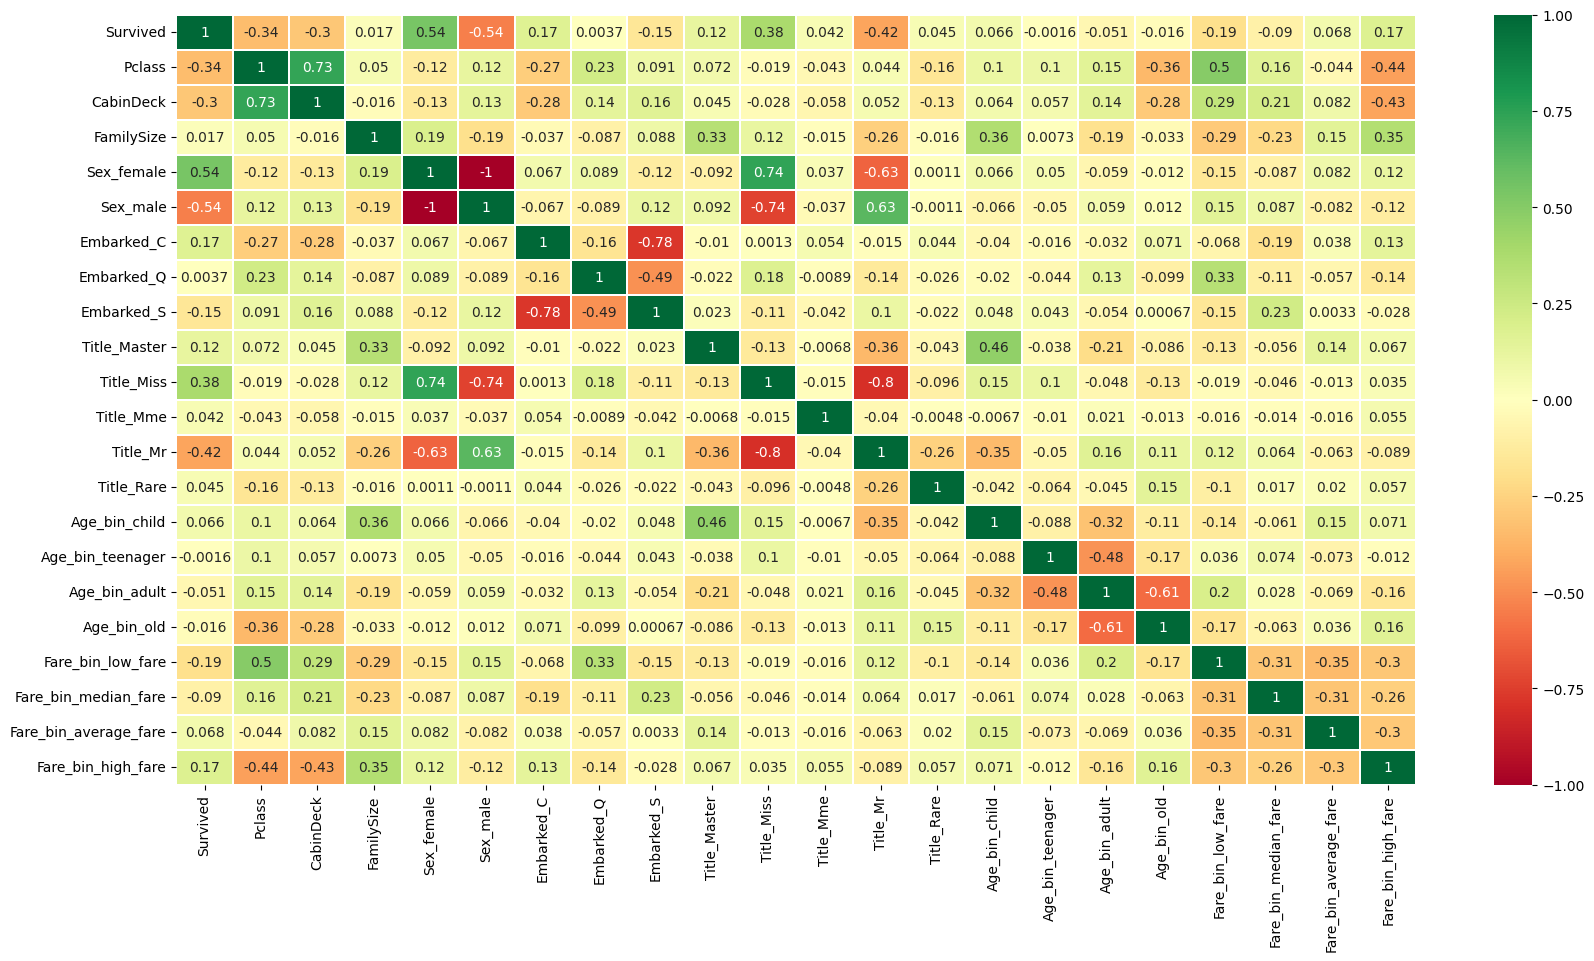

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidth=0.2)
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [ ]:
df.shape


(1309, 22)

In [ ]:
train_X=df[:891]
test_X=df[891:]

In [ ]:
train_X['Survived']

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
886,0.0
887,1.0
888,0.0
889,1.0


In [ ]:
train_X.drop(columns=['Survived'],inplace=True)

SyntaxError: unterminated string literal (detected at line 1) (<ipython-input-79-de6ed37e6017>, line 1)

In [ ]:
train_Y=train['Survived']

In [ ]:
train_X.shape

(891, 21)

In [ ]:
train_Y.shape

(891,)

In [ ]:
test_X.shape

(418, 22)

In [ ]:
from keras import models,layers

In [ ]:
from keras.layers import Dense,Dropout

In [ ]:
from keras import regularizers

In [ ]:
def titanic1():
  model=models.Sequential()
  model.add(layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
  model.add(layers.Dropout(0.25))
  model.add(layers.Dense(32,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
  model.add(layers.Dropout(0.25))
  model.add(layers.Dense(16,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
  model.add(layers.Dropout(0.25))
  model.add(layers.Dense(1,activation='sigmoid'))## warstwa wyjsciowa
  return model

In [ ]:
model1=titanic1()


In [ ]:
model1.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
extra_column = list(set(test_X.columns) - set(train_X.columns))[0]
test_X = test_X.drop(columns=[extra_column])


In [ ]:
history=model1.fit(train_X,train_Y,epochs=30,batch_size=128,validation_split=0.1)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8073 - loss: 0.5472 - val_accuracy: 0.8222 - val_loss: 0.4925
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8060 - loss: 0.5427 - val_accuracy: 0.8333 - val_loss: 0.4877
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8033 - loss: 0.5458 - val_accuracy: 0.8111 - val_loss: 0.4857
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8459 - loss: 0.4952 - val_accuracy: 0.8556 - val_loss: 0.4836
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8168 - loss: 0.5157 - val_accuracy: 0.8333 - val_loss: 0.4790
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8169 - loss: 0.5083 - val_accuracy: 0.8556 - val_loss: 0.4828
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8063 - loss: 0.5262 - val_accuracy: 0.8556 - val_loss: 0.4832
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8036 - loss: 0.5168 - val_accuracy: 0.8556 - val_loss: 0.4750


In [ ]:
pred=model1.predict(test_X)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
df=pd.DataFrame(pred)

In [ ]:
submission=pd.DataFrame({'PassengerId':pass_id,'Survived':df[0]})


In [ ]:
submission.to_csv('submission.csv', index=False)


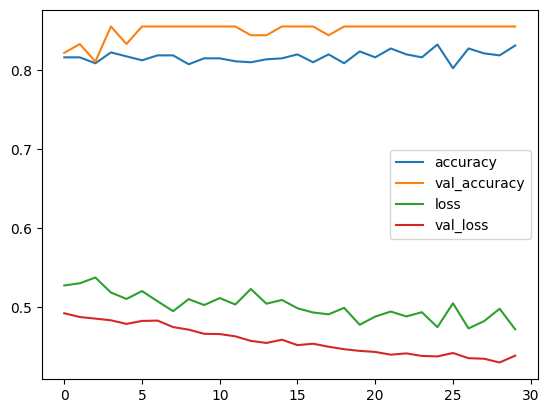

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

